7.998357923160768
7.626589142200471
7.600132485054197
7.594700397983359
7.593543897651051
7.593296371394891
7.5932433711351885
7.593232021805671
7.593229591449485
7.593229071008784


(array([ 1.,  0.,  1.,  2.,  5.,  5.,  7.,  3.,  3.,  4.,  1.,  4.,  3.,
        19.,  5.,  2.,  2.,  6.,  4.,  7.,  1.,  4.,  4.,  1.,  2.,  1.,
         1.,  0.,  0.,  2.]),
 array([-3.61297439, -3.16971571, -2.72645704, -2.28319836, -1.83993968,
        -1.396681  , -0.95342232, -0.51016364, -0.06690496,  0.37635372,
         0.8196124 ,  1.26287108,  1.70612976,  2.14938844,  2.59264712,
         3.0359058 ,  3.47916448,  3.92242316,  4.36568184,  4.80894052,
         5.2521992 ,  5.69545788,  6.13871655,  6.58197523,  7.02523391,
         7.46849259,  7.91175127,  8.35500995,  8.79826863,  9.24152731,
         9.68478599]),
 <BarContainer object of 30 artists>)

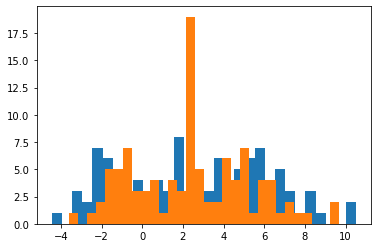

In [4]:
import numpy as np
import random
import math
import numdifftools
import matplotlib.pyplot as plt

random.seed(0)
np.random.seed(0)

e = math.e
pi = math.pi


def F(z):
    r = abs(z - np.median(MixtureSamples))
    alpha = 0.5  # Not sure how to choose this value
    return r * math.erf(r/alpha) + (alpha/math.sqrt(pi)) * math.pow(e, -(r/alpha) ** 2)


def BetaCalculation():  # Through gradient descent
    Proportion = 1  # Not sure how to choose this value
    xSummationDerivative = 0
    ySummationDerivative = 0
    for i in range(0, len(MixtureSamples)):
        xSummationDerivative += F(MixtureSamples[i])
    for j in range(0, len(StandardNormalSamples)):
        ySummationDerivative += F(StandardNormalSamples[j])
    Beta = (-1/len(MixtureSamples)) * xSummationDerivative + \
        (1/len(StandardNormalSamples)) * ySummationDerivative
    return Beta * Proportion


def u(x, Beta):
    return (x ** 2 / 2) + Beta * F(x)


def uConjugate(y, Beta):
    ConvexCandidate = []
    for i in range(0, len(MixtureSamples)):
        ConvexCandidate.append(
            (MixtureSamples[i] * y) - u(MixtureSamples[i], Beta))

    return max(ConvexCandidate)


def MixtureSampleGenerator():
    SubSamples1 = np.random.normal(0, 2, 100)
    SubSamples2 = np.random.normal(6, 2, 100)
    MixtureSamples = []
    for i in range(0, 100):
        RandomSelector = random.random()
        if RandomSelector < 0.7:
            MixtureSamples.append(SubSamples1[i])
        else:
            MixtureSamples.append(SubSamples2[i])
    # So with probability 0.7, choose from subsample 1, otherwise choose from subsample 2
    MixtureSamples = np.array(MixtureSamples)
    return MixtureSamples


def LLCalculation(Beta):
    xSummation = 0
    ySummation = 0
    for i in range(0, len(MixtureSamples)):
        xSummation += u(MixtureSamples[i], Beta)
    for j in range(0, len(StandardNormalSamples)):
        ySummation += uConjugate(StandardNormalSamples[j], Beta)

    LL = 1/len(MixtureSamples) * xSummation + 1 / \
        len(StandardNormalSamples) * ySummation

    return LL


def SamplesUpdate(MixtureSamples):
    NewMixtureSamples = []
    for i in range(0, len(MixtureSamples)):
        NewMixtureSamples.append(MixtureSamples[i] + Beta * numdifftools.Gradient(F)([MixtureSamples[i]]))
    NewMixtureSamples = np.array(NewMixtureSamples)

    return NewMixtureSamples


StandardNormalSamples = np.random.standard_normal(100)
MixtureSamples = MixtureSampleGenerator()
plt.hist(MixtureSamples, bins=30)

for i in range(0, 10):
    Beta = BetaCalculation()
    MixtureSamples = SamplesUpdate(MixtureSamples)
    LL = LLCalculation(Beta)
    print(LL)
plt.hist(MixtureSamples, bins=30)
